## Ford_Gobike_Systems
## by Subaru Goto

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This service has started since June 2017. Therefore, there is data from June 2017 to December 2018. The data set can be downloaded from https://www.fordgobike.com/system-data .

In [31]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime

%matplotlib inline

In [32]:
# open several zip files
# http://cracktechinterviews.com/Article.aspx?BlogID=21&Title=How-to-import-multiple-files-into-Pandas-data-frame-efficiently?
# get all the zip files
zip_files = glob.glob('2018*-fordgobike-tripdata.csv.zip')
# initialize the list for data frame
file_lists = []

for file in zip_files:
    
    data = pd.read_csv(file, header = 0, sep = ",")
    file_lists.append(data)

# merge
df_2018 = pd.concat(file_lists, ignore_index = True)

In [33]:
# check df
df_2018.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No
1863720,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,NaN,NaN,No


In [34]:
# check info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [35]:
# check na
df_2018.isna().sum() / df_2018.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.006316
start_station_name         0.006316
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.006316
end_station_name           0.006316
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.059407
member_gender              0.059219
bike_share_for_all_trip    0.000000
dtype: float64

In [36]:
# check summary statistics
df_2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [37]:
# load 2017 data into data frames
df_2017 = pd.read_csv("2017-fordgobike-tripdata.csv")

In [38]:
# check head
df_2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [39]:
# check na
df_2017.isna().sum() / df_2017.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.000000
start_station_name         0.000000
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.000000
end_station_name           0.000000
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.128037
member_gender              0.127885
dtype: float64

In [40]:
# check shape
print(df_2018.shape)
print(df_2017.shape)

(1863721, 16)
(519700, 15)


In [41]:
# check columns name
df_2018.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [42]:
# # check columns name
df_2017.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

## What is the structure of your dataset?

> Adding the both data sets, there are 2383421 observations in total. A number of columns is 16 for the 2018 data set and 15 for the 2017 data set. Before we start analyzing data, data cleaning is essential.
Following points should be checked in the data set.

### Quality issue

- missing value for start and end station id as well as name
- missing gender
- missing birth of year
- start and end time is string
- station id is float
- bike id is int
- gender is string
- bike share service is string
- bike share service column is missing in the 2017 data set
- user type is string
- duration in second is difficult to handle with
- member_birth_year is difficult to handle with

### Structure issue

- merge 2 data set together
- start time and end time contains dates and times

## Clean
### Defition
concatinate the 2 data sets and create one data frame. As bike_sare_for_all_trip service seems like a new service from 2018, I will create a new column for the 2017 data set with No.

In [43]:
# create a new column and fill in with "No"
df_2017["bike_share_for_all_trip"] = "No"

In [44]:
# check data set size
print(df_2017.size)
print(df_2018.size)
print(df_2017.size + df_2018.size)

8315200
29819536
38134736


In [45]:
# concat
df_all = pd.concat([df_2017, df_2018], ignore_index = True)

## Test

In [46]:
# check size
df_all.size

38134736

In [47]:
# check df
df_all.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
97203,131,2017-11-28 13:58:16.9720,2017-11-28 14:00:28.8800,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,1959,Subscriber,1985.0,Male,No
767453,565,2018-03-20 15:58:12.6080,2018-03-20 16:07:38.1080,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,862,Subscriber,1987.0,Male,No
676455,124,2018-02-12 08:35:37.8000,2018-02-12 08:37:42.3510,137.0,Jersey St at Castro St,37.750506,-122.433950,138.0,Jersey St at Church St,37.750900,-122.427411,811,Subscriber,1988.0,Male,No
2142167,685,2018-11-26 08:39:21.1080,2018-11-26 08:50:46.4050,81.0,Berry St at 4th St,37.775880,-122.393170,14.0,Clay St at Battery St,37.795001,-122.399970,3595,Subscriber,1984.0,Male,No
100411,1306,2017-11-27 17:20:49.1540,2017-11-27 17:42:35.5060,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,119.0,18th St at Noe St,37.761047,-122.432642,2256,Subscriber,1981.0,Male,No


In [48]:
# check info
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 290.9+ MB


In [49]:
# check duplication
df_all.duplicated().sum()

0

In [50]:
# check na
df_all.isna().sum() / df_all.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.004939
start_station_name         0.004939
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.004939
end_station_name           0.004939
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.074372
member_gender              0.074191
bike_share_for_all_trip    0.000000
dtype: float64

In [51]:
# check summary statistic
df_all.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.383421e+06,2.371650e+06,2.383421e+06,2.383421e+06,2.371650e+06,2.383421e+06,2.383421e+06,2.383421e+06,2.206162e+06
mean,9.100063e+02,1.142750e+02,3.776784e+01,-1.223524e+02,1.124780e+02,3.776798e+01,-1.223518e+02,2.160719e+03,1.982537e+03
std,2.643865e+03,9.797252e+01,1.018623e-01,1.545178e-01,9.785323e+01,1.017500e-01,1.541098e-01,1.252545e+03,1.051346e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.881000e+03
25%,3.570000e+02,3.000000e+01,3.777106e+01,-1.224116e+02,2.900000e+01,3.777166e+01,-1.224094e+02,1.119000e+03,1.977000e+03
50%,5.640000e+02,8.100000e+01,3.778127e+01,-1.223974e+02,8.100000e+01,3.778175e+01,-1.223971e+02,2.173000e+03,1.985000e+03
75%,8.850000e+02,1.810000e+02,3.779539e+01,-1.222948e+02,1.800000e+02,3.779539e+01,-1.222948e+02,3.116000e+03,1.990000e+03
max,8.636900e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


## Clean

### Definition
Missing value for station id/ name, birth of year and gender.

In [78]:
# check missing values
df_all[df_all.isnull().any(axis = 1)].sample(10)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,bike_share_for_all_trip,start_date,start_hour,start_min,end_date,end_hour,end_min,start_weekday,duration_min,age
366428,2017-09-08 17:15:31.059,2017-09-08 17:35:26.844,19.0,Post St at Kearny St,37.788975,-122.403452,98.0,Valencia St at 16th St,37.765052,-122.421866,...,No,2017-09-08,17,15,2017-09-08,17,35,Fri,19.916667,NaN
219697,2017-10-21 15:47:38.280,2017-10-21 15:55:27.804,144.0,Precita Park,37.747300,-122.411403,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,...,No,2017-10-21,15,47,2017-10-21,15,55,Sat,7.816667,NaN
752939,2018-03-24 14:17:22.589,2018-03-24 14:26:59.238,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,...,No,2018-03-24,14,17,2018-03-24,14,26,Sat,9.600000,NaN
193149,2017-10-28 13:58:06.259,2017-10-28 14:15:13.521,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,189.0,Genoa St at 55th St,37.839649,-122.271756,...,No,2017-10-28,13,58,2017-10-28,14,15,Sat,17.116667,NaN
1031046,2018-05-20 07:59:49.686,2018-05-20 08:23:00.326,64.0,5th St at Brannan St,37.776754,-122.399018,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,...,No,2018-05-20,7,59,2018-05-20,8,23,Sun,23.166667,NaN
1563237,2018-08-28 09:48:49.616,2018-08-28 09:56:48.305,96.0,Dolores St at 15th St,37.766210,-122.426614,89.0,Division St at Potrero Ave,37.769218,-122.407646,...,No,2018-08-28,9,48,2018-08-28,9,56,Tue,7.966667,NaN
497036,2017-07-18 19:07:39.988,2017-07-18 19:49:05.422,24.0,Spear St at Folsom St,37.789677,-122.390428,24.0,Spear St at Folsom St,37.789677,-122.390428,...,No,2017-07-18,19,7,2017-07-18,19,49,Tue,41.416667,NaN
58588,2017-12-08 16:45:22.305,2017-12-08 17:11:43.599,105.0,16th St at Prosper St,37.764285,-122.431804,99.0,Folsom St at 15th St,37.767037,-122.415443,...,No,2017-12-08,16,45,2017-12-08,17,11,Fri,26.350000,NaN
461534,2017-08-05 17:28:19.729,2017-08-05 18:30:42.938,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,...,No,2017-08-05,17,28,2017-08-05,18,30,Sat,62.383333,NaN
1716395,2018-08-02 20:03:54.099,2018-08-02 20:13:37.587,243.0,Bancroft Way at College Ave,37.869360,-122.254337,244.0,Shattuck Ave at Hearst Ave,37.873792,-122.268618,...,No,2018-08-02,20,3,2018-08-02,20,13,Thu,9.716667,NaN


> As it is difficult to get information, I will leave the missing value for now. A station name may be able to identify with the given latitude and longitude.

In [84]:
# find most common combination
df_all[df_all.start_station_id.isnull()].groupby(["start_station_latitude", "start_station_longitude"]).size().sort_values(ascending = False).head(10)

Series([], dtype: int64)

https://www.latlong.net/Show-Latitude-Longitude.html & https://member.fordgobike.com/map/
37.41 -121.94 = Baypointe Parkway, San Jose, California 95134, United States of America
37.40 -121.94 = 3331 N 1st St, San Jose, California 95134, United States
37.40 -121.93 = Central San Jose, San Jose, California 95125, United States of America
37.41 -121.96 = not found
37.40 -121.92 = Epic, 600 Epic Way, San Jose, California 95134, United States of America
37.42 -121.96 = not found
37.39 -121.93 = 2704 North 1st Street, San Jose, California 95134, United States of America
37.41 -121.93 = not found
37.42 -121.95 = not found
37.38 -121.93 = 2509 Orchard Parkway, San Jose, California 95131, United States of America

> there is a tendency that missing station name is data from San Jose. I will leave it as I can us other part of data even though the data is from other city.

### Clean

### Definition

Extract start/end year, month, day and time from the start / end time columns

In [54]:
# convert data type
df_all["start_time"] = pd.to_datetime(df_all.start_time)
df_all["end_time"] = pd.to_datetime(df_all.end_time)

In [56]:
# create new columns
df_all["start_date"] = df_all.start_time.dt.date
df_all["start_hour"] = df_all.start_time.dt.hour
df_all["start_min"] = df_all.start_time.dt.minute

df_all["end_date"] = df_all.end_time.dt.date
df_all["end_hour"] = df_all.end_time.dt.hour
df_all["end_min"] = df_all.end_time.dt.minute

In [57]:
# create date columns
df_all["start_date"] = pd.to_datetime(df_all.start_date)
df_all["end_date"] = pd.to_datetime(df_all.end_date)

In [73]:
# create weekday column and convert it to string
df_all["start_weekday"] = df_all.start_date.dt.dayofweek
df_all["start_weekday"] = df_all["start_weekday"].replace({0:"Mon",
                                                          1:"Tue",
                                                          2:"Wed",
                                                          3:"Thu",
                                                          4:"Fri",
                                                          5:"Sat",
                                                          6:"Sun"})

### Test

In [74]:
# check
df_all.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,bike_share_for_all_trip,start_date,start_hour,start_min,end_date,end_hour,end_min,start_weekday,duration_min,age
0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,...,No,2017-12-31,16,57,2018-01-01,15,12,Sun,1335.166667,31.0
1,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,...,No,2017-12-31,15,56,2018-01-01,13,49,Sun,1313.333333,53.0
2,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,...,No,2017-12-31,22,45,2018-01-01,11,28,Sun,762.800000,NaN
3,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,...,No,2017-12-31,17,31,2018-01-01,10,47,Sun,1036.200000,NaN
4,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,...,No,2017-12-31,14,23,2018-01-01,2,29,Sun,726.716667,21.0


## Clean
### Definition

Create a new column for usage duration in minitues. Then delet the duration_sec column.

In [60]:
# create min usage column
df_all["duration_min"] = df_all["duration_sec"] / 60

In [61]:
# drop min
df_all.drop("duration_sec", axis = 1, inplace = True)

## Test

In [62]:
# check
df_all.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'start_date', 'start_hour', 'start_min',
       'end_date', 'end_hour', 'end_min', 'start_weekday', 'duration_min'],
      dtype='object')

In [79]:
# check summary statistic
df_all.duration_min.describe()

count    2.371650e+06
mean     1.511513e+01
std      4.372715e+01
min      1.016667e+00
25%      5.950000e+00
50%      9.400000e+00
75%      1.473333e+01
max      1.439483e+03
Name: duration_min, dtype: float64

> Median is about 10 min and the max user rents a bike for about 14 hours. 75% of pepole tend to use a shared bike mostly shorter than 15 min.

## Clean
### Definition

Create a new column for age. current year - date of birth

In [109]:
# get year
this_year = datetime.today().year
df_all["age"] = this_year - df_all.member_birth_year
df_all.drop("member_birth_year", axis = 1, inplace = True)

## Test

In [113]:
# check
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371650 entries, 0 to 2383420
Data columns (total 23 columns):
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_gender              category
bike_share_for_all_trip    category
start_date                 datetime64[ns]
start_hour                 int64
start_min                  int64
end_date                   datetime64[ns]
end_hour                   int64
end_min                    int64
start_weekday              category
duration_min               float64
age                        float64
dtypes: category(3), datetime64[ns](4), float64(6), int64(4), obj

## Clean

### Definition 
several columns have wrong data types. Convert them.

In [102]:
# convert data types
df_all["start_station_id"] = df_all["start_station_id"].astype("str")
df_all["end_station_id"] = df_all["end_station_id"].astype("str")
df_all["bike_id"] = df_all["bike_id"].astype("str")
df_all["member_gender"] = df_all["member_gender"].astype("category")
df_all["bike_share_for_all_trip"] = df_all["bike_share_for_all_trip"].astype("category")
df_all["start_weekday"] = df_all["start_weekday"].astype("category")

## Test

In [103]:
# check
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2371650 entries, 0 to 2383420
Data columns (total 24 columns):
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
start_date                 datetime64[ns]
start_hour                 int64
start_min                  int64
end_date                   datetime64[ns]
end_hour                   int64
end_min                    int64
start_weekday              category
duration_min               float64
age                        float64
dtypes: category(3), datetime6

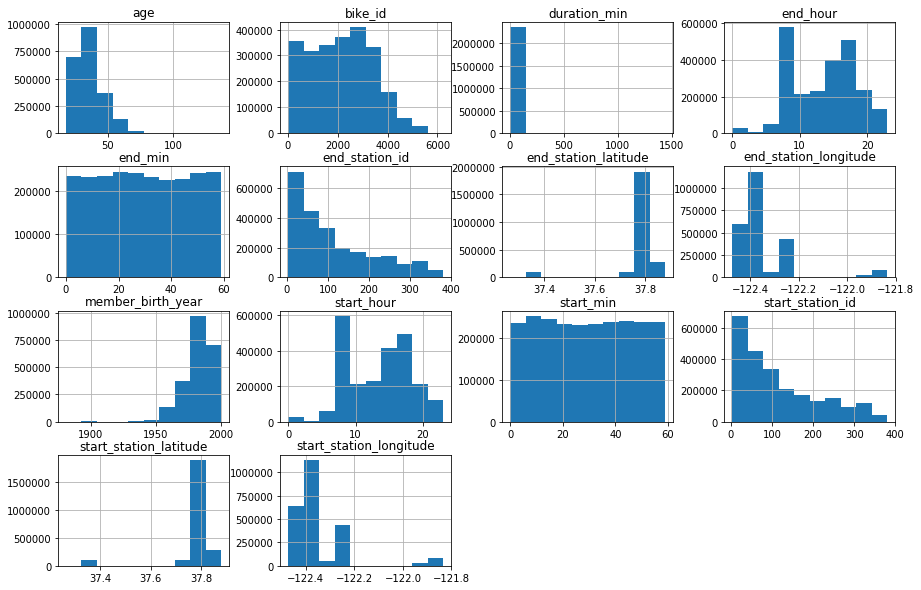

In [90]:
# check qucik histogram
df_all.hist(figsize=[15, 10]);

> Outlier of Latitude and Longitude are the data with a missing station name. The data is from the next city city.<p></p>
> Age and start hour can be interesting to look at.

### What is/are the main feature(s) of interest in your dataset?

- What kind of people are using this service?
- How long do people use the service per trip?
- when is do people use the service?
- Where (which) is the most frequently used station?
- What kind of changes can be seen over time?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Gender, age, bike_share_for_all_trip, user type, start_hour, weekday, month, date 
> With these variables I should be able to find some insights.

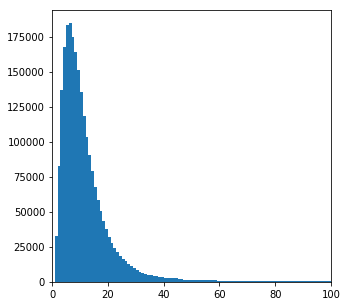

In [64]:
# hist
plt.figure(figsize=[5, 5])

# 1 min bins
bin_edges = np.arange(0, df_all["duration_min"].max() + 1, 1)
# focus on data below 100 min
plt.xlim(0, 100)
plt.hist(data = df_all, x = "duration_min", bins = bin_edges);

> According to the official website (https://www.fordgobike.com/pricing), their are 4 major types of pricing.
<ol>
    <li>2 dollar per trip / max 30 min</li>
    <li>10 dollar a day / unlimited 30 min ride</li>
    <li>15 dollar a month / unlimited 45min trips</li>
    <li>Bike Share For All 5 dollar for the first year / 60 min trip</li>

> Looking at the price systems, it makes sense that a peak is below 30min and there are some user for around 40 to 45 minutes uses as well as around 60 min uses.

In [65]:
# check missing values
df_all[df_all.isnull().any(axis = 1)].head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_gender,bike_share_for_all_trip,start_date,start_hour,start_min,end_date,end_hour,end_min,start_weekday,duration_min
2,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,...,NaN,No,2017-12-31,22,45,2018-01-01,11,28,6,762.800000
3,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,...,NaN,No,2017-12-31,17,31,2018-01-01,10,47,6,1036.200000
5,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,...,NaN,No,2017-12-31,22,51,2018-01-01,1,24,6,153.766667
7,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,...,NaN,No,2017-12-31,23,46,2018-01-01,0,58,6,72.233333
8,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,...,NaN,No,2017-12-31,23,37,2018-01-01,0,46,6,69.166667


In [69]:
# create age column
df_all["age"] = 2018 - df_all.member_birth_year

In [71]:
# check
df_all[df_all.age >= 100]

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,bike_share_for_all_trip,start_date,start_hour,start_min,end_date,end_hour,end_min,start_weekday,duration_min,age
287,2017-12-31 18:10:46.556,2017-12-31 18:20:28.352,274.0,Oregon St at Adeline St,37.857567,-122.267558,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,...,No,2017-12-31,18,10,2017-12-31,18,20,6,9.683333,118.0
1751,2017-12-30 17:17:54.969,2017-12-30 17:24:05.481,207.0,Broadway at Coronado Ave,37.835788,-122.251621,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,...,No,2017-12-30,17,17,2017-12-30,17,24,5,6.166667,118.0
3119,2017-12-29 18:24:08.722,2017-12-29 18:31:46.008,207.0,Broadway at Coronado Ave,37.835788,-122.251621,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,...,No,2017-12-29,18,24,2017-12-29,18,31,4,7.616667,118.0
3259,2017-12-29 17:20:22.096,2017-12-29 17:30:35.527,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,207.0,Broadway at Coronado Ave,37.835788,-122.251621,...,No,2017-12-29,17,20,2017-12-29,17,30,4,10.216667,118.0
5246,2017-12-28 16:48:41.310,2017-12-28 16:53:12.645,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,...,No,2017-12-28,16,48,2017-12-28,16,53,3,4.516667,118.0
7183,2017-12-27 16:37:47.863,2017-12-27 16:48:44.307,19.0,Post St at Kearny St,37.788975,-122.403452,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,...,No,2017-12-27,16,37,2017-12-27,16,48,2,10.933333,116.0
8077,2017-12-27 09:10:01.210,2017-12-27 09:18:22.353,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,No,2017-12-27,9,10,2017-12-27,9,18,2,8.350000,116.0
9838,2017-12-25 22:03:23.328,2017-12-25 22:12:54.959,176.0,MacArthur BART Station,37.828410,-122.266315,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,...,No,2017-12-25,22,3,2017-12-25,22,12,0,9.516667,118.0
10712,2017-12-24 17:05:39.482,2017-12-24 17:14:05.187,274.0,Oregon St at Adeline St,37.857567,-122.267558,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,...,No,2017-12-24,17,5,2017-12-24,17,14,6,8.416667,118.0
13035,2017-12-22 15:26:22.805,2017-12-22 15:33:05.766,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,176.0,MacArthur BART Station,37.828410,-122.266315,...,No,2017-12-22,15,26,2017-12-22,15,33,4,6.700000,118.0
